In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YTKwcyGh6KJE408Qz67E")
project = rf.workspace("selfdriving-car-qtywx").project("self-driving-cars-lfjou")
version = project.version(6)
dataset = version.download("yolov8")
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Self-Driving-Cars-6 in yolov8:: 100%|██████████| 9950/9950 [00:00<00:00, 10485.97it/s]


Train the YOLO model on custom dataset

In [5]:
!pip  install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 22.7 MB/s eta 0:00:0000:01


In [6]:
import os
os.chdir("/kaggle/working/Self-Driving-Cars-6")

In [7]:
%pwd

'/kaggle/working/Self-Driving-Cars-6'

### fine tune the YOLO models

In [8]:
!yolo task=detect mode=train model=yolov8n.pt data=data.yaml epochs=10 batch=15 imgsz=640


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100%|███████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 119MB/s]
Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=10, time=None, patience=100, batch=15, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True,

In [9]:
results='/kaggle/working/Self-Driving-Cars-6/runs/detect/train/'

In [10]:
results

'/kaggle/working/Self-Driving-Cars-6/runs/detect/train/'

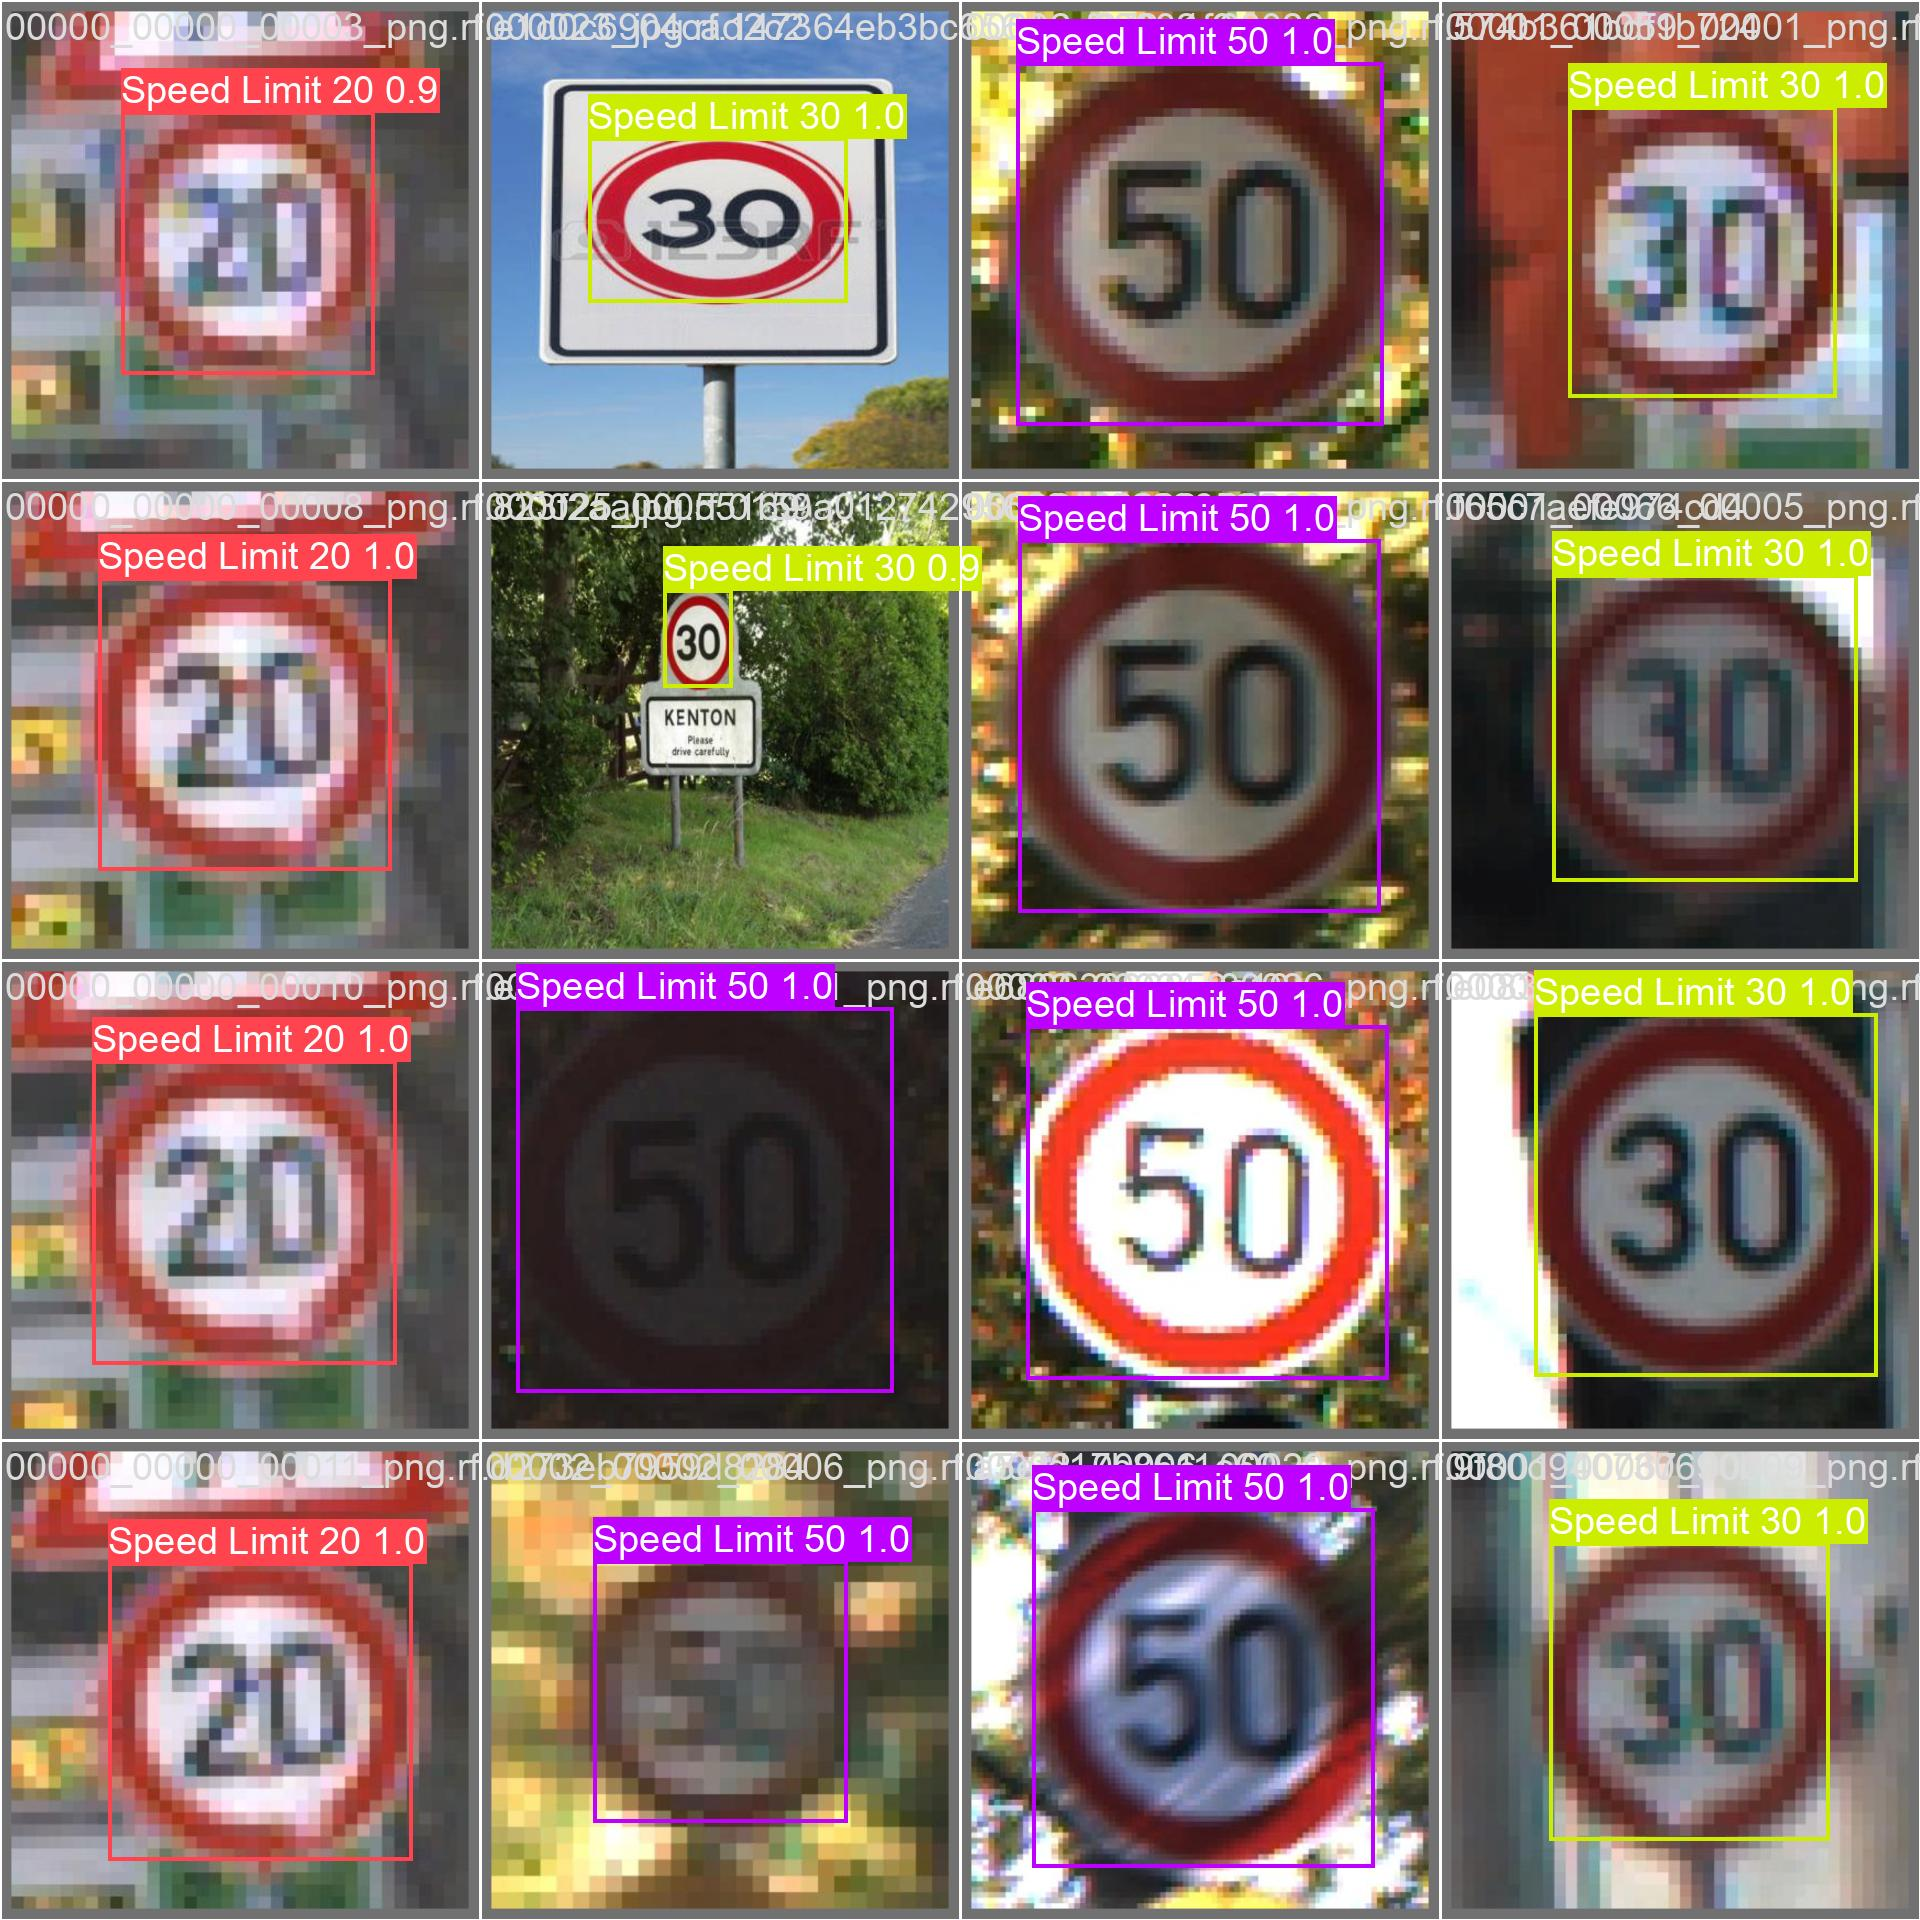

In [11]:
from IPython.display import Image, display 

Image(filename=f'{results}val_batch2_pred.jpg')

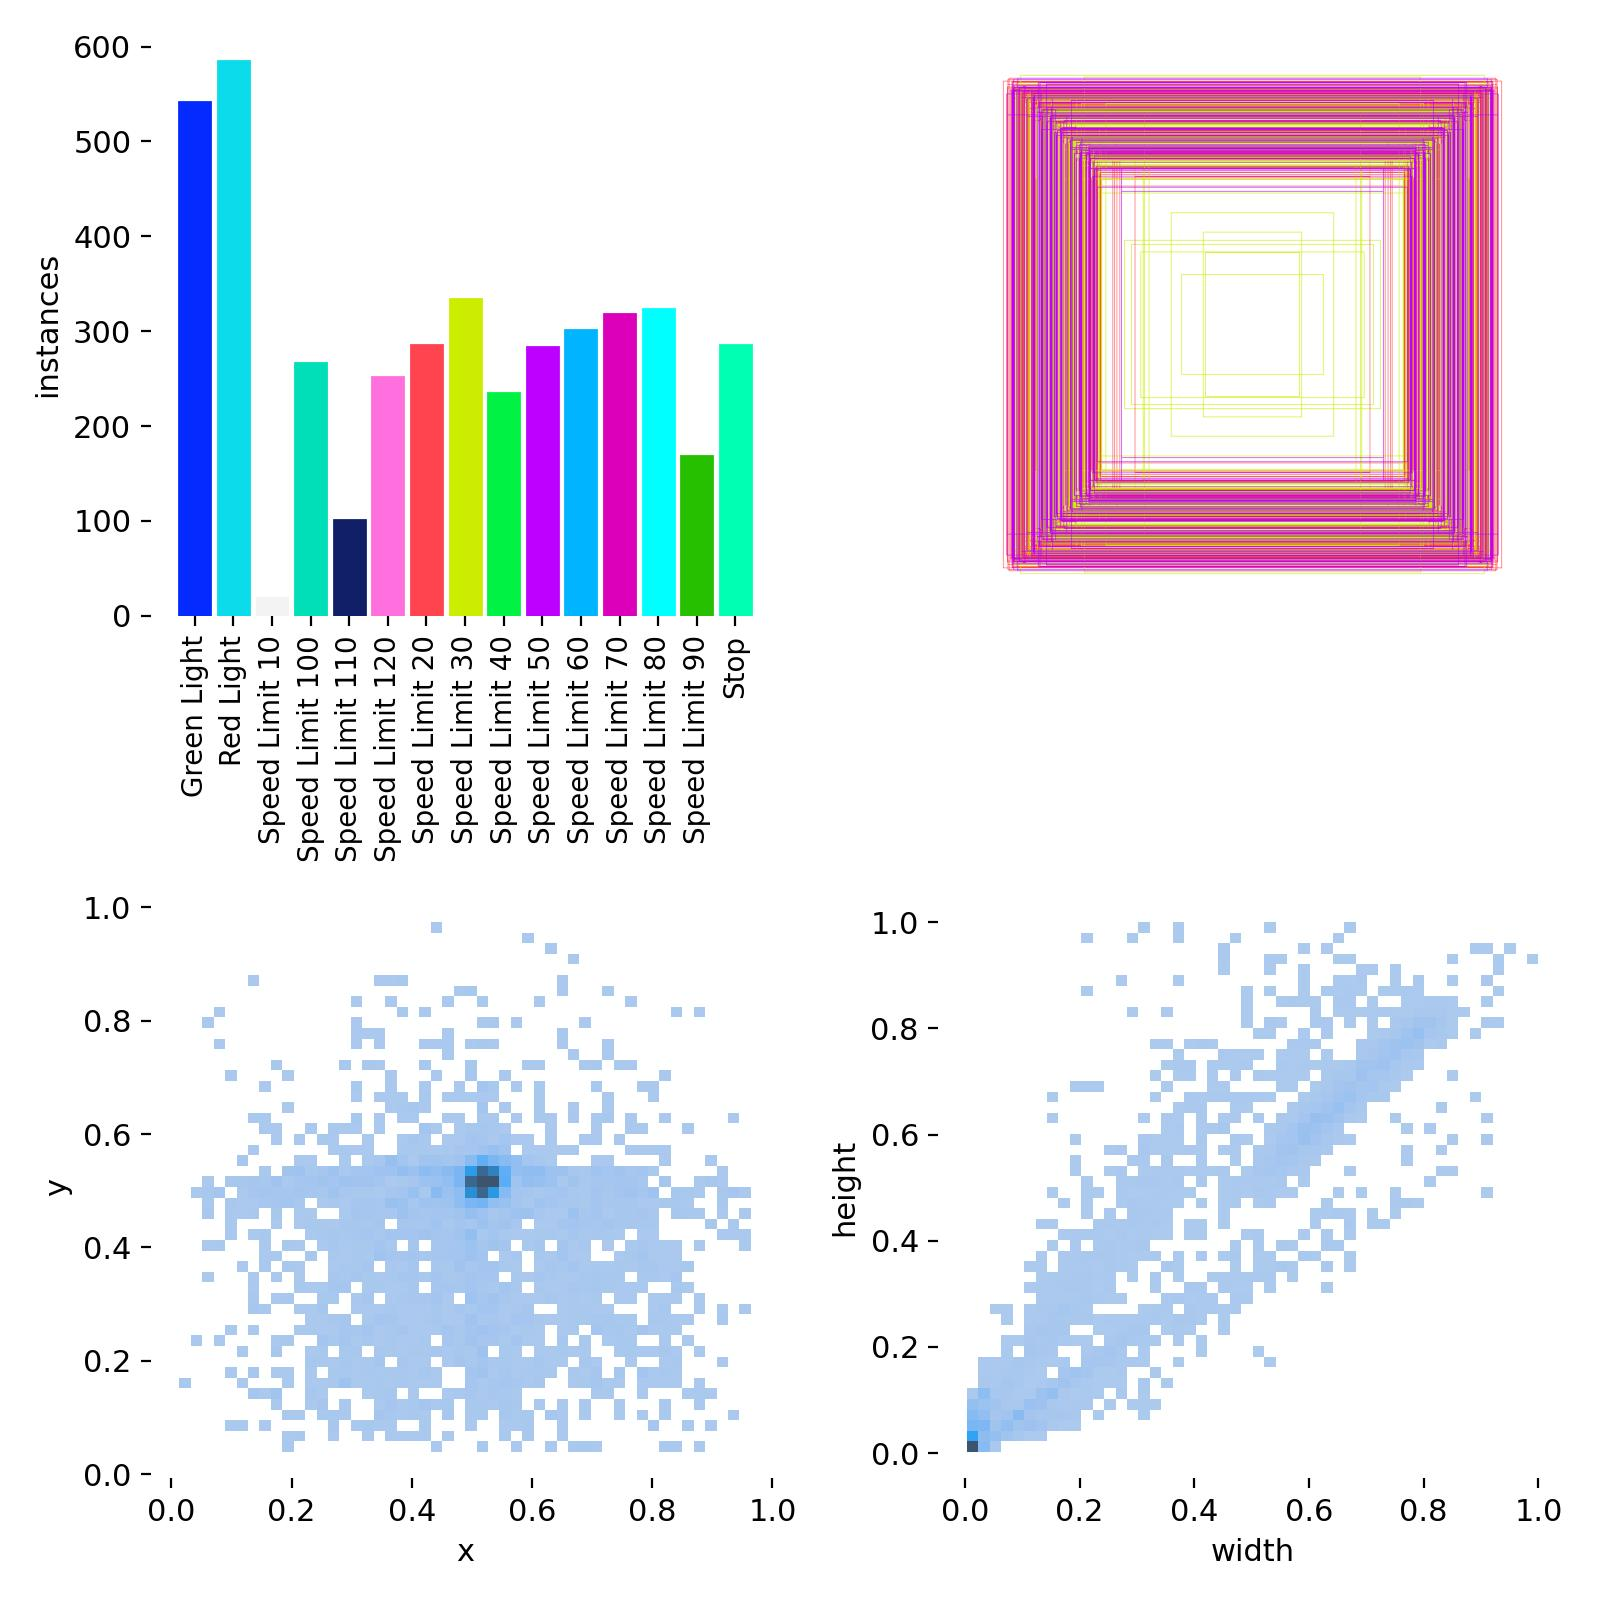

In [13]:
from IPython.display import Image, display 

Image(filename=f'{results}labels.jpg')

In [14]:
%pwd

'/kaggle/working/Self-Driving-Cars-6'

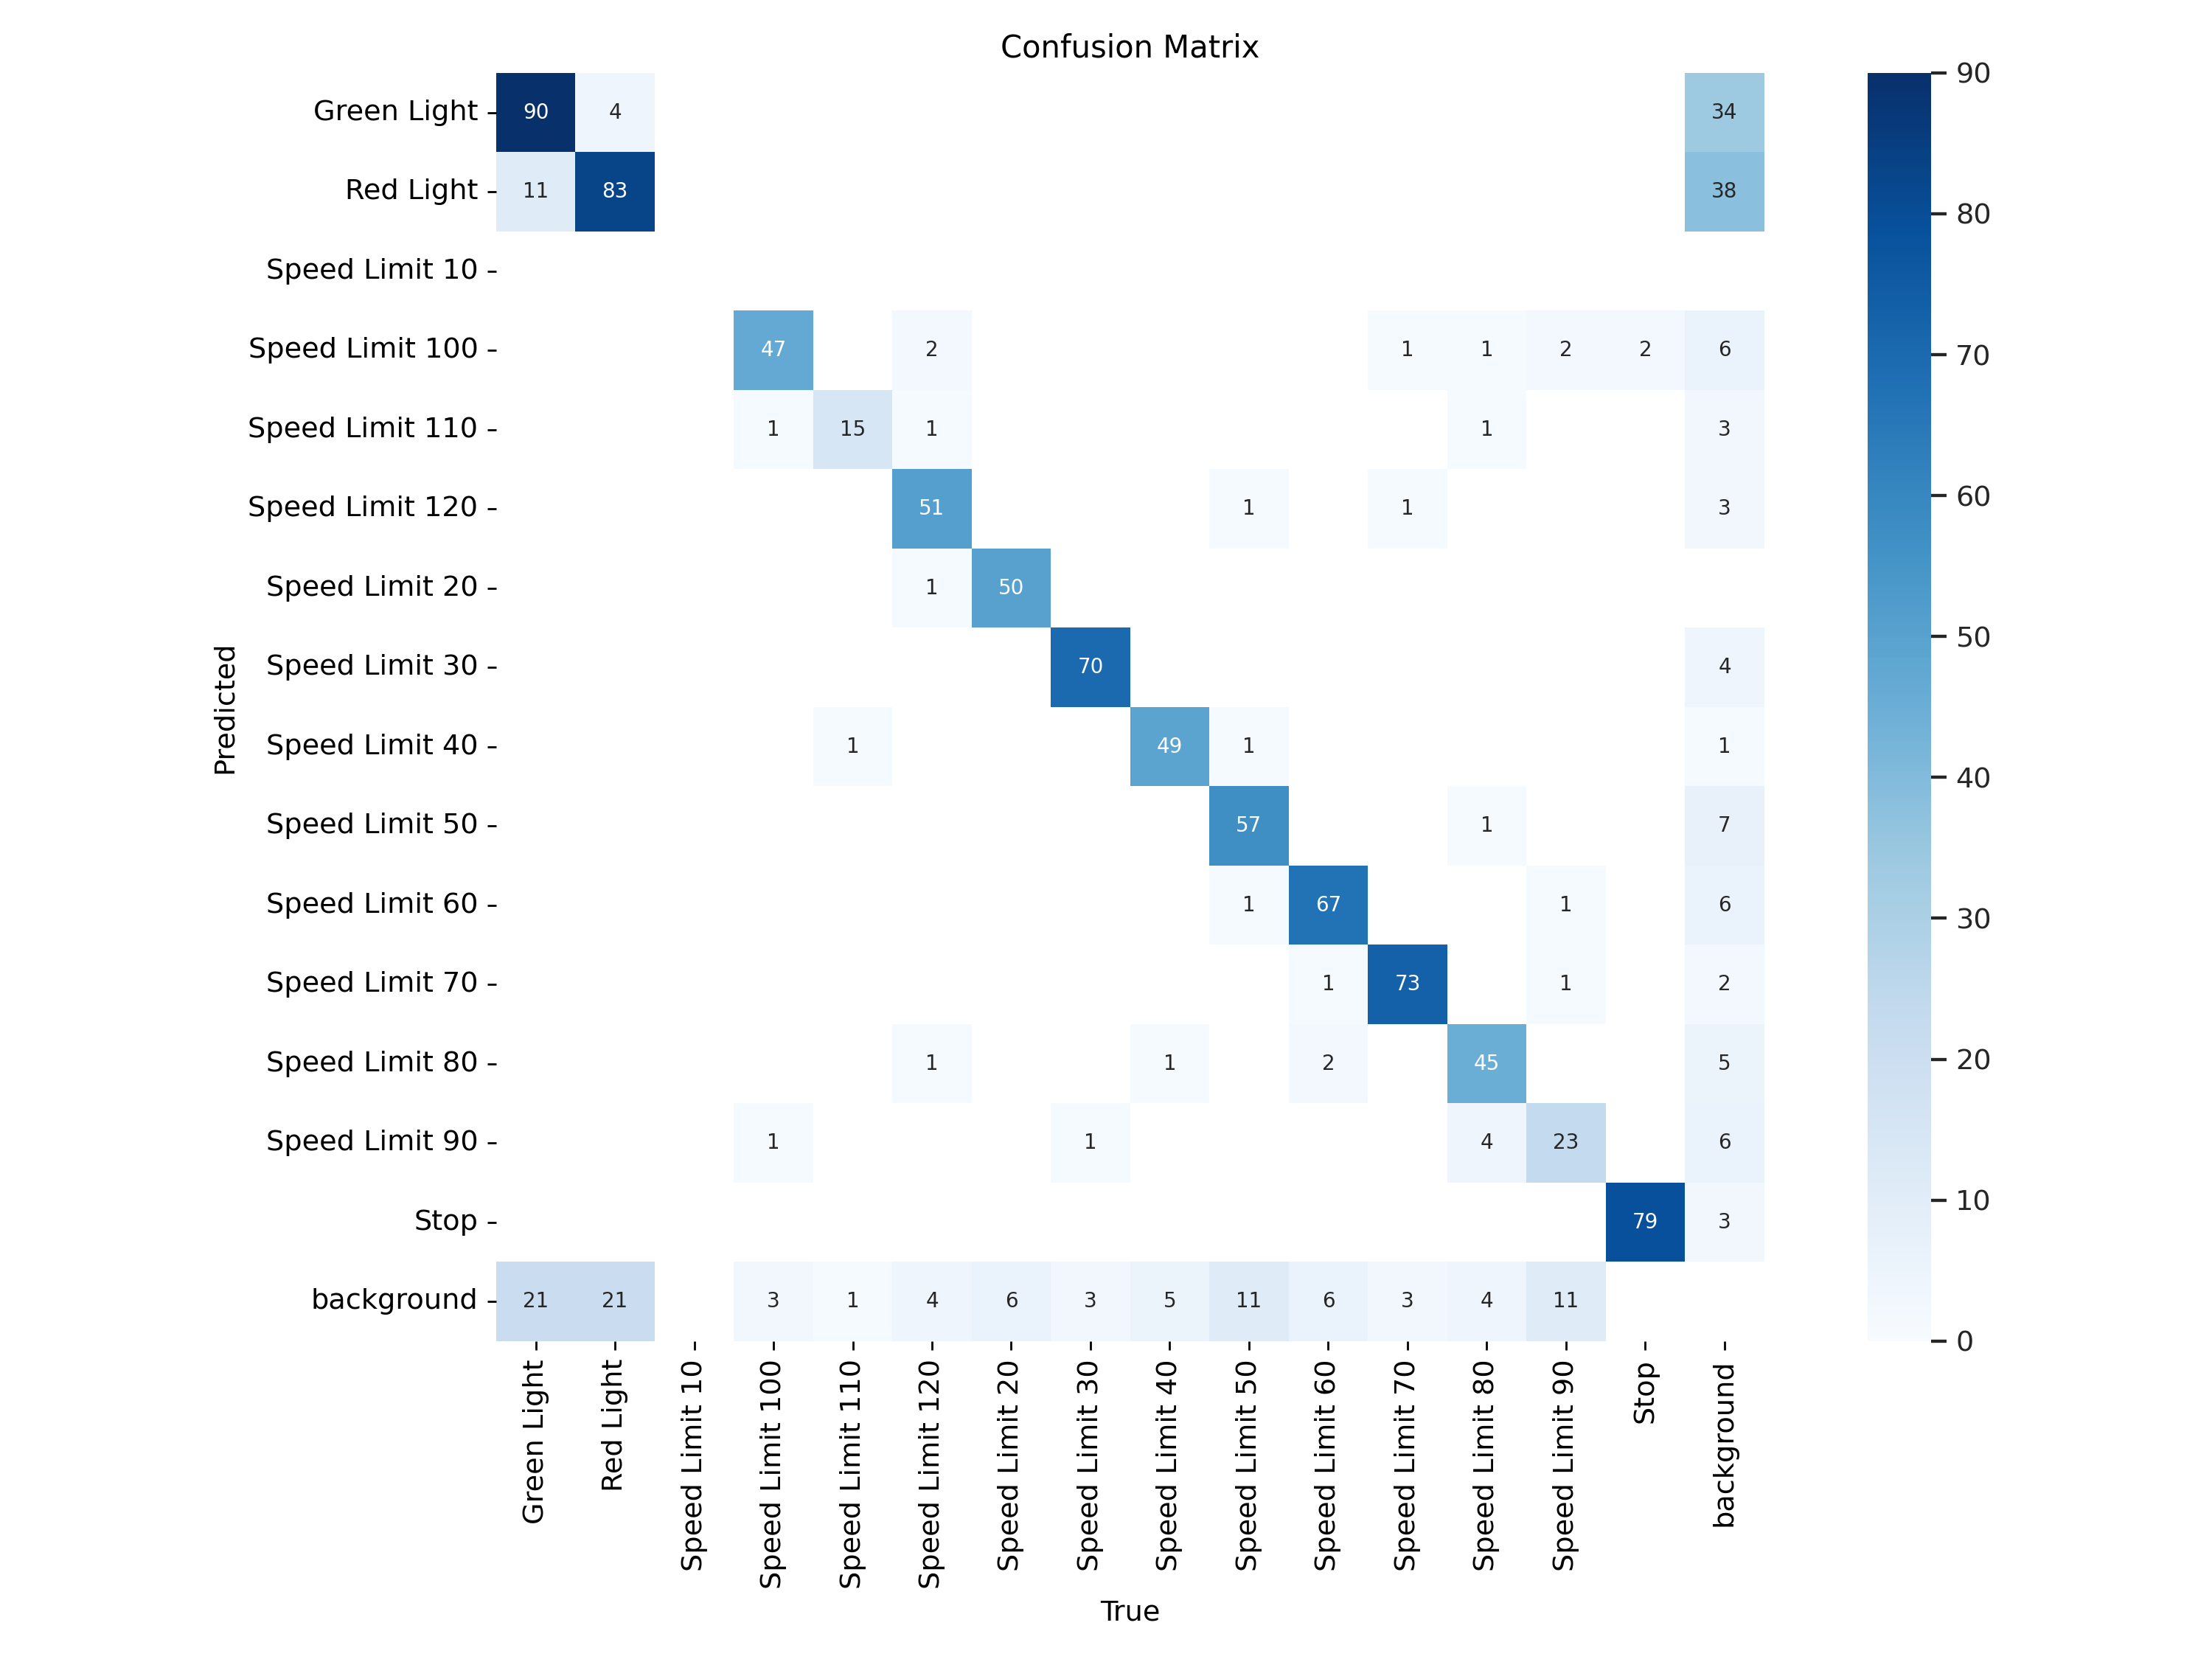

In [12]:
from IPython.display import Image, display 

Image(filename=f'{results}confusion_matrix.png')

In [15]:
os.chdir('/kaggle/working')

### input data 

In [18]:
%pwd

'/kaggle/working'

In [19]:
import os
import shutil

# Define source and destination directories
input_dir = '/kaggle/input/traffic-video'  # Replace with the actual input directory path
output_dir = '/kaggle/working/testing-data'  # The working directory
file_name='/kaggle/input/traffic-video/3999410-hd_1920_1080_24fps.mp4'
# Ensure the destination directory exists
os.makedirs(output_dir, exist_ok=True)

# Copy files from input to working directory
for file_name in os.listdir(input_dir):
    full_file_name = os.path.join(input_dir, file_name)
    if os.path.isfile(full_file_name):  # Ensure it's a file
        shutil.copy(full_file_name, output_dir)
        print(f"Copied: {file_name} to {output_dir}")

print("Data transfer completed.")


Copied: 3999410-hd_1920_1080_24fps.mp4 to /kaggle/working/testing-data
Data transfer completed.


In [20]:
weight_path='/kaggle/working/Self-Driving-Cars-6/runs/detect/train/weights'

In [21]:
!yolo task=detect mode=predict model={weight_path}/best.pt conf=0.25 source=/kaggle/working/testing-data/3999410-hd_1920_1080_24fps.mp4

Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (frame 1/335) /kaggle/working/testing-data/3999410-hd_1920_1080_24fps.mp4: 384x640 1 Red Light, 45.5ms
video 1/1 (frame 2/335) /kaggle/working/testing-data/3999410-hd_1920_1080_24fps.mp4: 384x640 1 Red Light, 7.0ms
video 1/1 (frame 3/335) /kaggle/working/testing-data/3999410-hd_1920_1080_24fps.mp4: 384x640 1 Red Light, 9.9ms
video 1/1 (frame 4/335) /kaggle/working/testing-data/3999410-hd_1920_1080_24fps.mp4: 384x640 1 Red Light, 6.8ms
video 1/1 (frame 5/335) /kaggle/working/testing-data/3999410-hd_1920_1080_24fps.mp4: 384x640 1 Red Light, 7.0ms
video 1/1 (frame 6/335) /kaggle/working/testing-data/3999410-hd_1920_1080_24fps.mp4: 384x640 1 Red Light, 6.7ms
video 1/1 (frame 7/335) /kaggle/working/testing-data/3999410-hd_1920_1080_24fps.mp4: 384x640 1 Red Light, 9.8ms
video 1/1 (frame 8/335) /kaggle/working/